# Title: Vehicle Insurance Subscription Analysis


#Executive Summary:
The aim of this dataset is to predict if a customer will buy insurance for their car after getting the quote. We are provided with number of features such as quote date, vechile make, vechile model, so many other detail by using which we have to decide if a person will buy the insurance.

To predict this, we will be cleaning the data, processing it, selecting the right features before modelling and predicting.  

The training dataset and test set are combined in the beginning to avoid repition of processing the test dataset.

## 1.Data Pre-Processing

**a. Addressing inconsistent entries in features(columns):**

The data could have been entered by the customer or the insurance agent. From looking at the data, the entered data for VEHICLEMAKE and VEHICLEMODEL exhibits notable inconsistencies with various spellings and errors. So, we have used dictionary to correct the vechile model with help of mapping which would map the vechile names based on common words.

**b. Managing missing values:**

1.  For string columns with missing values, the approach involves filling the blanks with "Unknown."

2.  Numeric columns with missing values, such as COMMUTE_DISTANCE, have blank data imputed using the median based on the NEW_VEHICLEMAKE column.

3.  In cases where annual_km, COMMUTE_DISTANCE are Null, the blank data is imputed with the mean, so that we can use the average.

4.  For YEARS_LICENSED, the NaN values were imputed with Mode.

**c. Feature elimination:**

1. Due to its dynamic nature, the Vehicle value, which changes yearly.

2. VEHICLEMODEL is removed as it is dependent on VEHICLEMAKE.

3. Apart from the mentioned above, 'MARKING_SYSTEM','TRACKING_SYSTEM','VEHICLE_OWNERSHIP', 'YEARS_AS_PRINCIPAL_DRIVER' were removed due huge NaN values.


**d. Feature Engineering:**

1.  String columns are transformed into numeric format using the one-hot encoding process. This involves creating new features.

2.  For Vechile Make, a dictionary mapping was created and the data was cleaned and got rid of all the spelling errors and wrong informations.

3.  Converted all the categorical values into Numerical with One Hot Encoding.

## 2.  Modelling

Initially we went with Lasso selection and forward feature selection before the pear review which didnot help us improve the accuracy.  So we went with Chi-squared test for modelling.  

This helped us pick the right set of features from One Hot encoding.  We were able to select 296 features and used them for our model testing.

## 3.  Model Testing :

We tested with three different models.  Starting with Logistic regression and followed by Categorical and Bernoulli Naive Bayes.  We also ran multiple iterations of alpha and binarize value on Bernoulli as it was promosing.

After that, we went with plotting the ROC Curves and compared the Pros and Cons of the Models after each modelling segment.

## 4.  Conclusion :
We went with Bernoulli as its accuracy was better compared to others and we were able to attain 78% in our test prediction accuracy



###Importing all the required libraries into the notebook.

We will be using seaborn, matplotlib to plot and use sklearn inbuilts model such as Gaussian Naive baiys, Berunollis Naive baiys and Logistic Regression to test our prediction and choose the one's with highest Accuracy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing test and train dataset from google drive with the help of drive library

train_df = pd.read_excel('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Training_1.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/Cooperators_Quotes_Dataset_Test_2.xlsx')

# **1.  Data Pre-Processing**

## Understanding the Dataset

In [ ]:
train_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


Immediately after looking at the dataset manually, we can see that there are multiple spelling errors in Vechile Make and Vechile Model.  Also, Quote Date, Years as principle driver raises concern.  Assuming this is the first time, we are looking at the data, we can look at the data and say, does even occupation matter. But, lets hold our horses, dig somemore into the data before coming to the conculsion.

1. To make our work easy, (no one likes to do the same job twice), we are joining the train and test dataset together for the data pre-processing and storing the IsBound Value(the data to be predicted) in a separate variable Y_Train.

2. Since we have concatanated both the datasets, we have to make sure to process the data carefully without affecting the indcies.  Otherwise, the Isbound values will be assigned to the wrong rows, which means that our data will be trained on the wrong set of values.

In [ ]:
# Dropping Is_Bound from the training dataset
X_train_df = train_df.drop("IS_BOUND", axis=1)

# Joining test and train dataset together
df = pd.concat([X_train_df, test_df])

#Creating a new variable to store the IsBound Value
Y_Train = train_df['IS_BOUND']

In [ ]:
# Before and After shape of Train, Test and concatanated Dataset
print(train_df.shape)
print(test_df.shape)
print(df.shape)

(101891, 26)
(15114, 25)
(117005, 25)


In [ ]:
# Finding the features with Missing values in the dataset.
nan_values = df.isna().sum()
nan_values = nan_values[nan_values>0]
print(nan_values)

ANNUAL_KM                         1
COMMUTE_DISTANCE              40604
MARKING_SYSTEM               116961
TRACKING_SYSTEM              116999
VEHICLE_OWNERSHIP             87950
VEHICLE_VALUE                 74832
GENDER                            5
YEARS_LICENSED                   11
YEARS_AS_PRINCIPAL_DRIVER    116225
OCCUPATION                        1
dtype: int64


What we see above are the missing values in each category. Instead trying to remember which feature has the highest Nan and so on.  We can plot a bar chart in ascending order with number of NaN values to make our job easy.

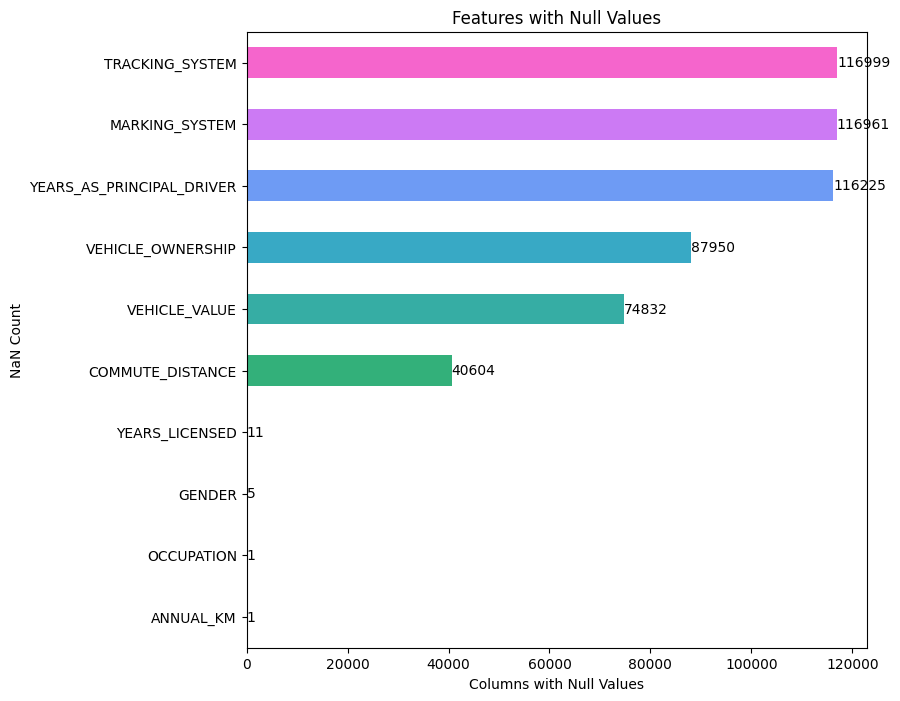

In [ ]:
#Sorting Features with Missing Values
nan_values_sorted = nan_values.sort_values()

# Choose the color palette 'husl' to make the bar chart attractive
colors = sns.color_palette("husl", n_colors=len(nan_values_sorted))

# Plotting BarChart to see the NULL values in columns with null_values:
ax = nan_values_sorted.plot(kind='barh', figsize=(8, 8), color=colors)
plt.title('Features with Null Values')
plt.xlabel('Columns with Null Values')
plt.ylabel('NaN Count')

for index, value in enumerate(nan_values_sorted):
    ax.text(value, index, str(value), ha='left', va='center')

plt.show()


Its much more easier now, and we can see out of 117005 values in dataframe, Tracking system, Marking System, Year as Principle driver have almost everything as missing values. Also, Vechile Ownership, Vechile Value, Commute Distance have some huge missing values.

Missing values are usually filled with some meaning full values(imputation).  But here since we have no idea or less to no idea, we can say, its better to drop some of the features with high Null values.

<Axes: >

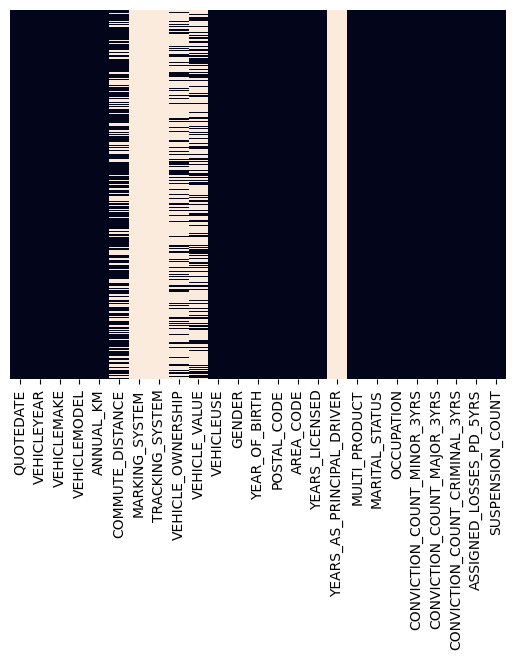

In [ ]:
# We call this the data scientist way of looking at NaN values - Heat Map
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

Even though both the plots show similar information in both the cases, in real life scenarios with huge set of data and features, Heat Map provides a better insight interms of co-relation between features and heat maps are better for displaying matrix data

Isbound Percentage : 
0: 78%
1: 21%


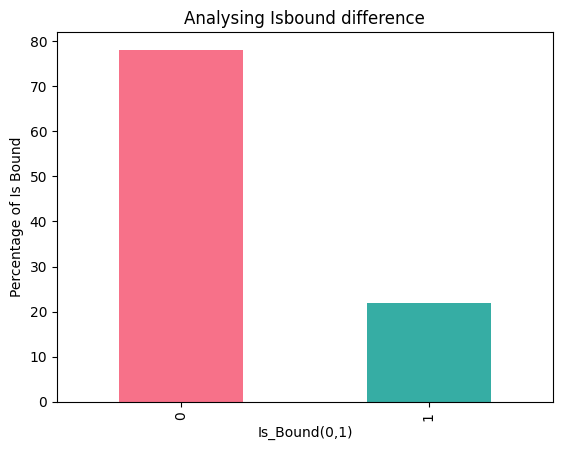

In [ ]:
# Calculatting the percentage of 1's and 0's in Training dataset

percentage_values = train_df['IS_BOUND'].value_counts(normalize=True) * 100
print("Isbound Percentage : \n0: " + str(int(percentage_values[0])) +"%" +"\n1: " + str(int(percentage_values[1]))+"%" )
colors = sns.color_palette("husl", n_colors=len(percentage_values))

# Plotting the percentage of 1's and 0's in Training dataset

percentage_values.plot(kind='bar', color=colors)
plt.title('Analysing Isbound difference')
plt.xlabel('Is_Bound(0,1)')
plt.ylabel('Percentage of Is Bound')
plt.show()

From our plot and percentage we can see that the number of 0's are higher than 1's.  We will be tuning the models accordingly in the future to balance this imbalance.

In [ ]:
# Analysing Vechile and Vechile Model

count_vechile_make = df['VEHICLEMAKE'].value_counts()
unique_vechile_make = df['VEHICLEMAKE'].unique()
print("Vechile_Make : Count")
for i in unique_vechile_make:
  if 'honda' in i.lower():
    print(i, ":", count_vechile_make[i])

Vechile_Make : Count
HONDA : 10392
HONDA TRUCK/VAN : 3816
HONDA CAMION/VAN : 6
HONDA ACCORD : 1
HONDA  CIVIC : 1
HONDA CIVIC : 1
HONDA 650 : 1
HONDA CR- V : 1


1.  In the above code, we have taken all the unique values in the dataset and tried to find values which are very similar.  Here, we have taken "Honda" and we can see the similar values in the dataset.  

2.  In the later section of the code we will try to clean Vechile Make with help of dictionary mapping and pandas.

In [ ]:
# Analysing Gender to check if it requires imputation
df.GENDER.unique()

array(['Male', 'Female', nan, 'Unknown'], dtype=object)

In [ ]:
# Analysing occupation to check if it requires imputation

df.OCCUPATION.unique()

array(['Trades', 'Not Known', 'Retired', 'Professional/Social', 'Student',
       'Professional/Other', 'Office/Stores', 'Management/Administration',
       'Government ', 'Service Work', 'Unemployed', 'Labour/Plant',
       'Farm/Fisher', 'Sales', 'Insurance', 'Homemaker',
       'Professional/Health', 'Military', 'Tradesman', nan], dtype=object)

In [ ]:
# Skeleton of the dataset -- Gives us info about the datatype and Nan Values in the

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117005 entries, 0 to 15113
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       117005 non-null  datetime64[ns]
 1   VEHICLEYEAR                     117005 non-null  int64         
 2   VEHICLEMAKE                     117005 non-null  object        
 3   VEHICLEMODEL                    117005 non-null  object        
 4   ANNUAL_KM                       117004 non-null  float64       
 5   COMMUTE_DISTANCE                76401 non-null   float64       
 6   VEHICLEUSE                      117005 non-null  object        
 7   GENDER                          117000 non-null  object        
 8   YEAR_OF_BIRTH                   117005 non-null  int64         
 9   POSTAL_CODE                     117005 non-null  object        
 10  AREA_CODE                       117005 non-null  object  

## Imputation and Dropping Columns

Now that we have an overall idea of how the data looks, we can now start making changes to the dataset accordingly to make our prediction accurate.

How do we make it accurate?
1. We can drop columns which doesnt give us any meaningful information or has a lot of missing values or you think it wont contribute to the prediction
2. The second thing we can try to do is, impute the missing values with something meaningful.  This has to be done to columns which you think would help improving the accuracy.



### Dropping Columns

In our case, we will have to drop Marking System, Tracking System, Vechile Ownership, Vechile Value, Years as principle driver as dont contribute much to our prediction. Also, we are dropping Vechile Model due to its huge set of unique values.

In [ ]:
# Dropping features which doesn't contribute to our prediction

df = df.drop(columns = ['MARKING_SYSTEM','TRACKING_SYSTEM','VEHICLE_OWNERSHIP','VEHICLE_VALUE','YEARS_AS_PRINCIPAL_DRIVER','VECHILE_MODEL'])

### Converting Numerical features into Categorical

From our understanding of the data, we were able to find features which would perform better if they are categorical.  They are are as Vechile year, Year of Birth and year Licensed.

This is because, converting years to categorical can help prevent overfitting and converting the year to categorical can also capture the nonlinearities more explicitly.

In [ ]:
columns_to_convert = ['VEHICLEYEAR', 'YEAR_OF_BIRTH', 'YEARS_LICENSED']
df[columns_to_convert] = df[columns_to_convert].astype(str)

### Imputation

From earlier, we saw that we have couple of NaN values in Gender, Annual km, Commute distance, year licensed and vechile Make. We will be imputing them

1.  We will be imputing the NaN values of Gender and Occupation with "Unknown"
2.  We will be imputing the NaN values of Annual km, commute distance, with mean.
3.  We will be imputing the NaN values of year licensed with mode.

In [ ]:
# Imputing Null values with mean for features annual km and commute distance

df['ANNUAL_KM'].fillna(df['ANNUAL_KM'].mean(), inplace=True)
df['COMMUTE_DISTANCE'].fillna(df['COMMUTE_DISTANCE'].mean(), inplace=True)

In [ ]:
# Imputing Null values with mode for feature Years Licensed

df['YEARS_LICENSED'] = df['YEARS_LICENSED'].fillna(df['YEARS_LICENSED'].mode()[0])

In [ ]:
# Imputing Null values with unkown for Gender

df['GENDER'] = df['GENDER'].fillna('Unknown')

 In Gender, we have a third value of "unknown" apart from "men" and "women", hence, we are imputing the NaN values with "unknown"

In [ ]:
# Imputing Null values with unkown for Occupation

df['OCCUPATION'] = df['OCCUPATION'].fillna('Unknown')

For Vechile Making, we designed a dictionary mapping to create group similar brands into One and reduce the spelling errors which were found in the data pre-processing stage.

In [ ]:
def map_vehicle_make(n):
    brand_mapping = {
        'HON': 'HONDA',
        'ACU': 'ACURA',
        'BMW': 'BMW',
        'AUD': 'AUDI',
        'BUI': 'BUICK',
        'CAD': 'CADILLAC',
        'FORD': 'FORD',
        'GEO': 'GEO',
        'GMC': 'GMC',
        'INF': 'INFINITI',
        'JAG': 'JAGUAR',
        'JE': 'JEEP',
        'KIA': 'KIA',
        'LAN': 'LAND ROVER',
        'LEX': 'LEXUS',
        'LIN': 'LINCOLN',
        'MAZ': 'MAZDA',
        'MERCE': 'MERCEDES',
        'MERCU': 'MERCURY',
        'DOD': 'DODGE',
        'DOG': 'DODGE',
        'CHR': 'CHRYSLER',
        'CHY': 'CHRYSLER',
        'CRY': 'CHRYSLER',
        'CHE': 'CHEVROLET',
        'CEV': 'CHEVROLET',
        'CHC': 'CHEVROLET',
        'HUN': 'HYUNDAI',
        'HYN': 'HYUNDAI',
        'HYU': 'HYUNDAI',
        'MIT': 'MITSUBISHI',
        'NIS': 'NISSAN',
        'OLD': 'OLDSMOBILE',
        'PLY':'PLYMOUTH',
        'PON': 'PONTIAC',
        'POR': 'PORSCHE',
        'RAN': 'RANGE ROVER',
        'ROV': 'RANGE ROVER',
        'SAA': 'SAAB',
        'SAT': 'SATURN',
        'SUB': 'SUBARU',
        'SUZ': 'SUZUKI',
        'TES': 'TESLA',
        'TOY':'TOYOTA',
        'TRA': 'TRAILLITE',
        'VOLK': 'VOLKSWAGEN',
        'VOLV': 'VOLVO'

    }
    for prefix, make in brand_mapping.items():
        if n.startswith(prefix):
            return make
    return n

# Apply the mapping function to the 'VEHICLEMAKE' column
df['VEHICLEMAKE'] = df['VEHICLEMAKE'].apply(map_vehicle_make)


We took four continous letter from each brand and created a dictionary mapping with its corressponding brand and ran it over the vechile make feature.  By doing this we were able to improve the feature.

In [ ]:
# Checking if all the NaN values are Filled with something meaningful

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117005 entries, 0 to 15113
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   VEHICLEYEAR                     117005 non-null  object 
 1   VEHICLEMODEL                    117005 non-null  object 
 2   ANNUAL_KM                       117005 non-null  float64
 3   COMMUTE_DISTANCE                117005 non-null  float64
 4   VEHICLEUSE                      117005 non-null  object 
 5   GENDER                          117005 non-null  object 
 6   YEAR_OF_BIRTH                   117005 non-null  object 
 7   POSTAL_CODE                     117005 non-null  object 
 8   AREA_CODE                       117005 non-null  object 
 9   YEARS_LICENSED                  117005 non-null  object 
 10  MULTI_PRODUCT                   117005 non-null  object 
 11  MARITAL_STATUS                  117005 non-null  object 
 12  OCCUPATION            

## Encoding Categorical Values

With the help of pandas we are converting all the categorical values into numerical.  This is also called as One-Hot encoding.

In [ ]:
# Performing One-hot encoding on Categorical Values

df_encoded = pd.get_dummies(df, drop_first=True)

The above line of code might be short, but its going to help us in improving the accuracy.  The above line of code will assign a binary value to each value and will create unique features.  This will give the model more information to learn from.

Since we made sure to impute and make necessary changes without touching the order of the values in which the rows where present in the beginning.  We can split them into Train and Test.

Now that we are done with data pre-processing and imputations.  We can start modelling our dataset.  But before that, we have to splitted the dataset into Training and Test and assigned new names.  

In [ ]:
# Splitting the processed dataset into training and test.

processed_train_df = df_encoded[0:101891]
processed_test_df = df_encoded[101891:]

In the data pre-processing stage, we had already printed out the shape of the test and train which helped us here to split them without any inaccuracies.

# **2.  Feature Engineering**

For Feature selection, we are going to use chi-squared test.  From what we have learnt and reviewing in pear review, chi-squared test gives a better result in the final model prediction.

We did try Lasso Selection and forward feature selection. Considering the time it took and the features it produced, we went with chi-squared test.

In [ ]:
# Performing Chi-squared test

chi2_stat, chi2_p = chi2(processed_train_df, Y_Train)
print('Number of features after using Chi-Squared Test:', len(chi2_p))

Features Produced After Chi - Squared Test : 7981


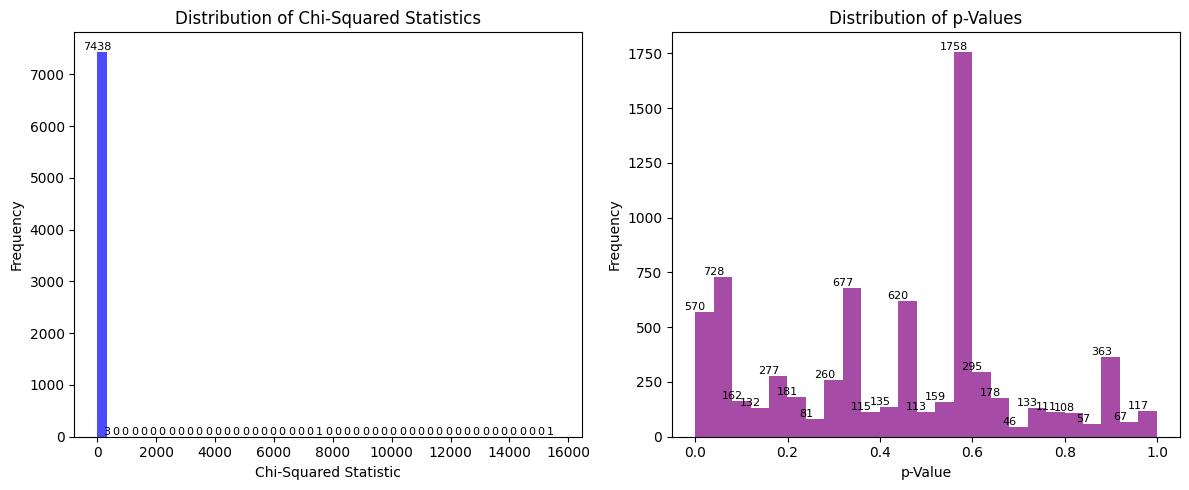

In [ ]:
# Plotting the distribution of chi-squared statistics - Took reference from chatgpt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(chi2_stat, bins = 50, color='blue', alpha = 0.7)
plt.title('Chi-Squared Statistics')
plt.xlabel('Chi-Squared Statistic')
plt.ylabel('Frequency')

for i in range(len(hist)):
    plt.text(bins[i], hist[i], f'{hist[i]:.0f}', ha = 'center', va = 'bottom', fontsize = 8)

# Plotting the distribution of p-values
plt.subplot(1, 2, 2)
hist, bins, _ = plt.hist(chi2_p, bins = 'auto', color='purple', alpha = 0.7)
plt.title('')
plt.xlabel('p-Value')
plt.ylabel('Frequency')

for i in range(len(hist)):
    plt.text(bins[i], hist[i], f'{hist[i]:.0f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

The Distribution of Chi-Squared Statistics plot suggests there is little to no association for 7438 out of 7981 features.

So, we can say that, we have 543 significant features.

1.  We prioritize features with higher chi-squared statistics and lower p-values for classification relevance.
2.  Adjusting the significance level yields a specific number of significant features.

In [ ]:
# Creating a empty list to append the selected features from chi-squared test.
chi2_features_lst = []

# For loop to append the features
for i in range(0, len(chi2_p)):
    if (chi2_p[i] < 0.0073):
        chi2_features_lst.append(i)

print("Number of Significant features after using Chi-Squared Test:", len(chi2_features_lst))

Number of Significant features after using Chi-Squared Test: 296


# **3.  Modelling**

In [ ]:
# Removing the features which are not in our selected feature list

X_Train = processed_train_df[[processed_train_df.columns[i] for i in chi2_features_lst]]
X_Test = processed_test_df[[processed_test_df.columns[i] for i in chi2_features_lst]]


In [ ]:
X_Train.shape
X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_Train, test_size=0.2, random_state=42)

(101891, 296)

Now that we are done with our **Feature Engineering**, its time to test our dataset with different models to check which model gives us the best accuracy.  We will be using that model to predict.

## **Model - Logistic Regression**

In [ ]:
lgr = LogisticRegression()
y_pred = lgr.fit(X_Train, Y_Train).predict(X_Test)
y_pred_arr = []
for i in y_pred:
    y_pred_arr.append(i)
print(y_pred_arr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

The goal of Logistic Regression is to discover a relationship between features and predict the occurance of a specific outcome, it takes a more inclusive approach.It is simple and efficient as it provides the probability for each observation. The model performs by assigining equal preference to all features and then it assesses their collective impact to predict whether the person is leaning towards buying insurance.

## **Model - Categorical Naive Bayes**

In [ ]:
cnb = CategoricalNB()
y_pred = cnb.fit(X_Train, Y_Train).predict(X_Test)
y_pred_arr = []
for i in y_pred:
    y_pred_arr.append(i)
print(y_pred_arr)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Categorical data pertains to variables with a finite, predefined set of values. Specifically designed for categorical feature scenarios, Categorical Naive Bayes estimates probabilities for each category within each feature. It leverages Bayes theorem to make predictions based on these probabilities. This algorithm is well-suited for datasets where features are characterized by distinct categories rather than being binary or continuous.

## **Model - Bernoulli Naive Bayes**

In [ ]:
# Checking Accuracy for different values of alpha and binarize values

alpha_values = [0.9, 0.02, 0.5]
binarize_values = [0.9, 0.9, 2]

for alpha_value in alpha_values:
    for binarize_value in binarize_values:
        model = BernoulliNB(alpha=alpha_value, binarize=binarize_value)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"alpha={alpha_value}, binarize={binarize_value}, Accuracy: {accuracy:.2f}")


alpha=0.9, binarize=0.9, Accuracy: 0.78
alpha=0.9, binarize=0.9, Accuracy: 0.78
alpha=0.9, binarize=2, Accuracy: 0.78
alpha=0.02, binarize=0.9, Accuracy: 0.78
alpha=0.02, binarize=0.9, Accuracy: 0.78
alpha=0.02, binarize=2, Accuracy: 0.78
alpha=0.5, binarize=0.9, Accuracy: 0.78
alpha=0.5, binarize=0.9, Accuracy: 0.78
alpha=0.5, binarize=2, Accuracy: 0.78


In [ ]:
bnb = BernoulliNB(alpha=0.1, binarize=0.5)
y_pred = bnb.fit(X_Train, Y_Train).predict(X_Test)
y_pred_arr = []
for i in y_pred:
    y_pred_arr.append(i)
print(y_pred_arr)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Bernoulli Naive Bayes functions in a certain way, where it takes into consideration yes-or-no questions in order to arrive at the final conclusion. It trains on specific details and it makes use of Bayes theorem describes the probability of an event based on the prior knowledge or other certain known probabilities of that event. BernoulliNB works just with binary values and gives much better results than other standard algorithms. Additionally, its probabilistic character makes it more stable in terms of results. BeronoulliNB requires greater independence in dataset features. As a result, high co-relation among features in the dataset will affect the algorithm's performance. This is the algorithm's main disadvantage.

In [ ]:
# Training Models

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Categorical Naive Bayes
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

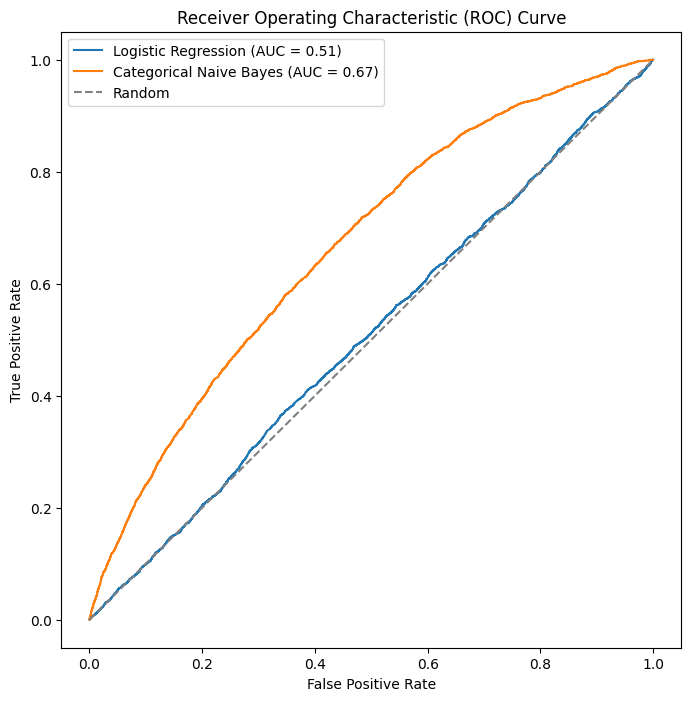

In [ ]:
# Making probability predictions on bith the models
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
roc_auc_logreg = roc_auc_score(y_test, logreg_probs)

# ROC curve for Categorical Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = roc_auc_score(y_test, nb_probs)

# Plotting the ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Categorical Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Logistic Regression
print("\t\t  LOGISTIC REGRESSION")
print("\nAccuracy:", accuracy_score(y_test, logreg_predictions))
print("Classification Report:\n", classification_report(y_test, logreg_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_predictions))

print("\n", "-" * 55)

# Categorical Naive Bayes
print("\t\tCATEGORICAL NAIVE BAYES")
print("\nAccuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))

		  LOGISTIC REGRESSION

Accuracy: 0.78144168016095
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     15925
           1       0.00      0.00      0.00      4454

    accuracy                           0.78     20379
   macro avg       0.39      0.50      0.44     20379
weighted avg       0.61      0.78      0.69     20379

Confusion Matrix:
 [[15925     0]
 [ 4454     0]]

 -------------------------------------------------------
		CATEGORICAL NAIVE BAYES

Accuracy: 0.7815398204033563
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     15925
           1       0.75      0.00      0.00      4454

    accuracy                           0.78     20379
   macro avg       0.77      0.50      0.44     20379
weighted avg       0.77      0.78      0.69     20379

Confusion Matrix:
 [[15924     1]
 [ 4451     3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Comparision between Logistic and Categorical Naive Bayes**

1.  Categorical data refers to variables that can take on a limited, fixed set of values. Categorical Naive Bayes is tailored for scenarios where the features are categorical. The algorithm estimates the probabilities of each category within each feature and uses Bayes theorem to make predictions based on these probabilities.
2.  Upon examining the graph, it becomes apparent that the AUC (Area Under the Curve) value for the Categorical Naive Bayes model surpasses that of the Logistic Regression model. This suggests that, in terms of overall predictive performance, the Naive Bayes model outshines Logistic Regression model.
3.  Categorical Naive Bayes can be a suitable choice when dealing with datasets where features are not binary or continuous but represent different categories.


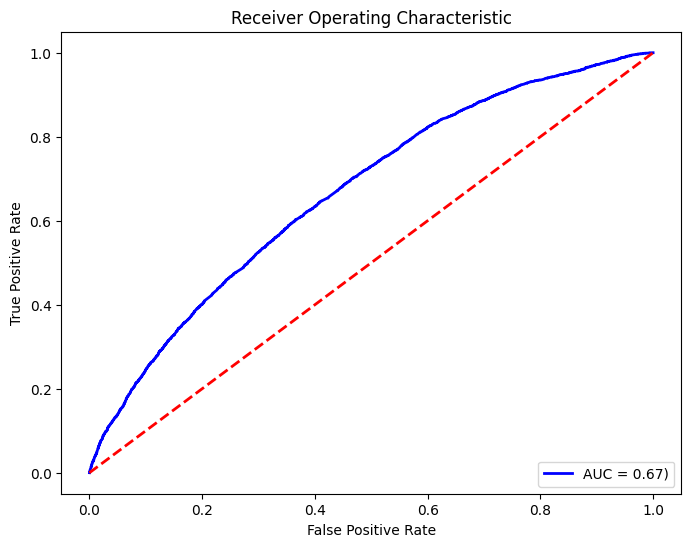

Confusion Matrix:
[[15388   537]
 [ 3966   488]]


In [ ]:
# Train the Bernoulli Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Predict the 'ISBOUND' column for the test set with probabilities
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Predict the target variable for the test set
y_pred = nb_classifier.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


### **Comparision between Logistic and Bernoulli**

1.  The ROC curve serves as a focal point in indicating how well our models predict whether someone will opt for insurance. Ideally, a curve climbing up and to the left signifies more accurate predictions with fewer mistakes. The AUC for Bernoulli is higher than Logistic Regression

2.  Therefore when choosing between these models, it boils down to the primary goal of our analysis. If our aim is precision, favoring specific details and patterns, then Bernoulli Naive Bayes emerges as the preferred choice over Logistic Regression. On the contrary, if our objective involves considering all possible scenarios and weighing their importance in a broader context, then Logistic Regression proves to be the more suitable option. Therefore, the model selection depends on aligning our approach with the objective of the project.

### **CONCLUSION**

Since, Bernoulli's Naive Bayes provides better accuracy. By uploading our predictions from Bernoulli's Naive Bayes, we were able to attain 78% test set accuracy and 80% with Logistic Regression.